In [0]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf

%matplotlib inline

In [0]:
#Generating random sample for training data for degenerated network
def sample_data(size = 1000):
  data = []
  x = np.random.random_sample((size,))
  for i in range(size):
    y = x[i] ** 2
    data.append([x[i],y])
  
  return np.array(data)

#Generating random noise for the Generative Network
def sample_z(length,size):
  return np.random.uniform(low = -1,high = 1,size = [length,size])

In [0]:
# data = sample_data()
# plt.scatter(data[:,0],data[:,1])

In [0]:
###Creating the Generative Network and the Degenerator network

#Generative Network
def generative(z):
  hidden1 = tf.nn.relu(tf.matmul(z,G_w1) + G_b1)
  hidden2 = tf.matmul(hidden1,G_w2) + G_b2
  prob = tf.nn.softmax(hidden2)

  return prob

#Degenerative Network
def degenerator(x):
  hidden1 = tf.nn.relu(tf.matmul(x,D_w1) + D_b1)
  hidden2 = tf.matmul(hidden1,D_w2) + D_b2

  return hidden2,tf.nn.softmax(hidden2)

In [0]:
#Degenerative part Initialization
X = tf.placeholder(dtype = tf.float32,shape = [None,2],name = "DegenrativeInput")

G_w1 = tf.Variable(tf.random.normal(shape = [2,16]))
G_b1 = tf.Variable(tf.zeros(shape = [16]))
G_w2 = tf.Variable(tf.random.normal(shape = [16,2]))
G_b2 = tf.Variable(tf.zeros(shape = [2]))

#Generative part Initialization
Z = tf.placeholder(dtype = tf.float32,shape = [None,2],name = "GenerativeInput")

D_w1 = tf.Variable(tf.random.normal(shape = [2,16]))
D_b1 = tf.Variable(tf.zeros(shape = [16]))
D_w2 = tf.Variable(tf.random.normal(shape = [16,1]))
D_b2 = tf.Variable(tf.zeros(shape = [1]))


theta_g = [G_w1,G_w2,G_b1,G_b2]
theta_d = [D_w1,D_w2,D_b1,D_b2]

In [0]:
#So let's assign all of this things
G_sample = generative(Z)
D_real_logits,D_real_prob = degenerator(X)
D_fake_logits,D_fake_prob = degenerator(G_sample)

#loss defnition and the optimizer initialisation
D_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=D_real_logits,labels=tf.ones_like(D_real_logits)) + tf.nn.softmax_cross_entropy_with_logits_v2(logits=D_fake_logits,labels=tf.zeros_like(D_fake_logits)))
G_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=D_fake_logits,labels=tf.ones_like(D_fake_logits)))

D_solver = tf.train.AdamOptimizer(learning_rate=0.001).minimize(D_loss,var_list = theta_d)
G_solver = tf.train.AdamOptimizer(learning_rate=0.001).minimize(G_loss,var_list = theta_g)

In [92]:
X_data = sample_categorical(10000)
Z_data = sample_z(length = 10000,size = 2)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for iteration in range(10000):
    # G_loss = g_current_loss + tf.convert_to_tensor(np.square(np.median(X_data) - np.median(z_gen)) + np.square(np.mean(X_data) - np.mean(z_gen)))
    d_solver,d_current_loss = sess.run([D_solver,D_loss],
                                       feed_dict = {X:X_data,Z:Z_data})
    g_solver,g_current_loss = sess.run([G_solver,G_loss],
                                       feed_dict = {X:X_data,Z:Z_data})
    
    if iteration % 1000 == 0:
      # corrcoeff = np.corrcoef(z_gen[:,0],z_gen[:,1])[0][1]
      print("Iteration {} is having Discriminator loss :{} and Generator loss:{}".format(iteration,d_current_loss,g_current_loss))
      print("-"*150)
    z_gen = sess.run(G_sample,feed_dict = {X:X_data,Z:Z_data})

Iteration 0 is having Discriminator loss :0.0 and Generator loss:0.0
------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1000 is having Discriminator loss :0.0 and Generator loss:0.0
------------------------------------------------------------------------------------------------------------------------------------------------------


KeyboardInterrupt: ignored

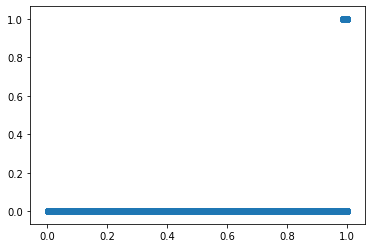

In [77]:
# plt.scatter(X_data[:,0],X_data[:,1])
plt.scatter(df_gen['feature'],df_gen['label'])

In [0]:
def sample_categorical(size = 100):
  data = []
  x = np.random.random_sample(size = (size,))

  for i in range(size):
    y = np.random.choice([0,1,2])
    if y == 1:
      x[i] = x[i] + 0.5
      data.append([x[i],y])
    else:
      data.append([x[i],y])

  return np.array(data)

# category = sample_categorical()
# plt.scatter(category[:,0],category[:,1])

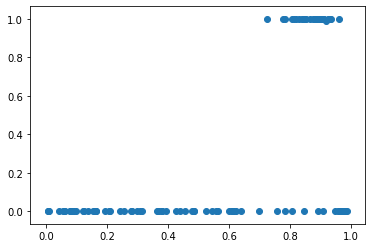

In [48]:
# plt.scatter(z_gen[:,0],z_gen[:,1])

In [79]:
cnt = 0
cnt1 = 0
for i in z_gen[:,1]:
  if i == 1:
    cnt += 1
for i in X_data[:,1]:
  if i == 1:
    cnt1 += 1

print(cnt,cnt1)

5162 4999


In [50]:
X_data[:,1]

array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [61]:
z_gen[:,1]

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [0]:
import pandas as pd

df_real = pd.DataFrame(X_data,columns=['feature','label'])
df_gen  = pd.DataFrame(z_gen,columns = ['feature','label'])

In [81]:
df_real.head()

,feature,label
0,1.097494,1.0
1,0.658703,1.0
2,0.410221,0.0
3,1.465850,1.0
4,1.452989,1.0


In [82]:
X_real = df_real['feature']
Y_real = df_real['label']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X_real,Y_real,test_size = 0.2)
model_real = LogisticRegression().fit(np.array(x_train).reshape(-1,1),np.array(y_train))
pred_real = model_real.predict(np.array(x_test).reshape(-1,1))

print("The Accuracy Score of the real data is:",accuracy_score(y_test,pred_real))

The Accuracy Score of the real data is: 0.747


In [0]:
df_gen['label'][df_gen['label'] > 0.5] = 1
df_gen['label'][df_gen['label'] < 0.5] = 0
X_gen = df_gen['feature']
Y_gen = df_gen['label']

In [84]:
x_train_gen,x_test_gen,y_train_gen,y_test_gen = train_test_split(X_gen,Y_gen,test_size = 0.2)
model_gen = LogisticRegression().fit(np.array(x_train_gen).reshape(-1,1),np.array(y_train_gen))
pred_gen = model_gen.predict(np.array(x_test_gen).reshape(-1,1))

print("The Accuracy Score of the generated data from GAN is:",accuracy_score(y_test_gen,pred_gen))

The Accuracy Score of the generated data from GAN is: 0.892


In [74]:
df_gen['label'].value_counts()

1.0    5052
0.0    4948
Name: label, dtype: int64